In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df1=pd.read_excel('Entertainer - Basic Info.xlsx')
df2=pd.read_excel('Entertainer - Breakthrough Info.xlsx')
df3=pd.read_excel('Entertainer - Last work Info.xlsx')

In [3]:
df1.head()


,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [4]:
df2.head()


,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


In [5]:

df3.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(70, 3)
(70, 4)
(70, 3)


In [10]:

df = pd.merge(df1, df2, on='Entertainer')
df = pd.merge(df, df3, on='Entertainer')


print("\nMerged Data:")
print(df.head())



Merged Data:
       Entertainer Gender (traditional)  Birth Year  \
0            Adele                    F        1988   
1   Angelina Jolie                    F        1975   
2  Aretha Franklin                    F        1942   
3      Bette Davis                    F        1908   
4      Betty White                    F        1922   

   Year of Breakthrough/#1 Hit/Award Nomination  \
0                                          2008   
1                                          1999   
2                                          1967   
3                                          1934   
4                                          1952   

                          Breakthrough Name  Year of First Oscar/Grammy/Emmy  \
0                                        19                           2009.0   
1                         Girl, Interrupted                           1999.0   
2  I Never Loved a Man (The Way I Love You)                           1968.0   
3                          O

In [9]:
df.shape

(70, 8)

In [15]:

print("\nMissing Values:")
print(df.isnull().sum())


df['Year of Death'].fillna(-1, inplace=True)
mean_year = int(df['Year of First Oscar/Grammy/Emmy'].mean())


df['Year of First Oscar/Grammy/Emmy'].fillna(mean_year, inplace=True)


df['Birth Year'] = df['Birth Year'].astype(int)
df['Year of First Oscar/Grammy/Emmy'] = df['Year of First Oscar/Grammy/Emmy'].astype('Int64')
df['Year of Death'] = df['Year of Death'].astype('int')
df = df.replace(-1, pd.NA)
df.to_csv('merged_data.csv', index=False)
print("\nData Types:")
print(df.dtypes)



Missing Values:
Entertainer                                     0
Gender (traditional)                            0
Birth Year                                      0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 0
Year of Last Major Work (arguable)              0
Year of Death                                   0
dtype: int64

Data Types:
Entertainer                                     object
Gender (traditional)                            object
Birth Year                                       int64
Year of Breakthrough/#1 Hit/Award Nomination     int64
Breakthrough Name                               object
Year of First Oscar/Grammy/Emmy                  Int64
Year of Last Major Work (arguable)               int64
Year of Death                                   object
dtype: object



Summary Statistics:
        Birth Year  Year of Breakthrough/#1 Hit/Award Nomination  \
count    70.000000                                     70.000000   
mean   1935.585714                                   1964.228571   
std      24.135783                                     22.411935   
min    1889.000000                                   1915.000000   
25%    1916.000000                                   1949.500000   
50%    1935.500000                                   1963.500000   
75%    1954.000000                                   1983.500000   
max    1988.000000                                   2008.000000   

       Year of First Oscar/Grammy/Emmy  Year of Last Major Work (arguable)  
count                             70.0                           70.000000  
mean                       1976.214286                         1998.971429  
std                          21.184417                           22.874561  
min                             1929.0                    

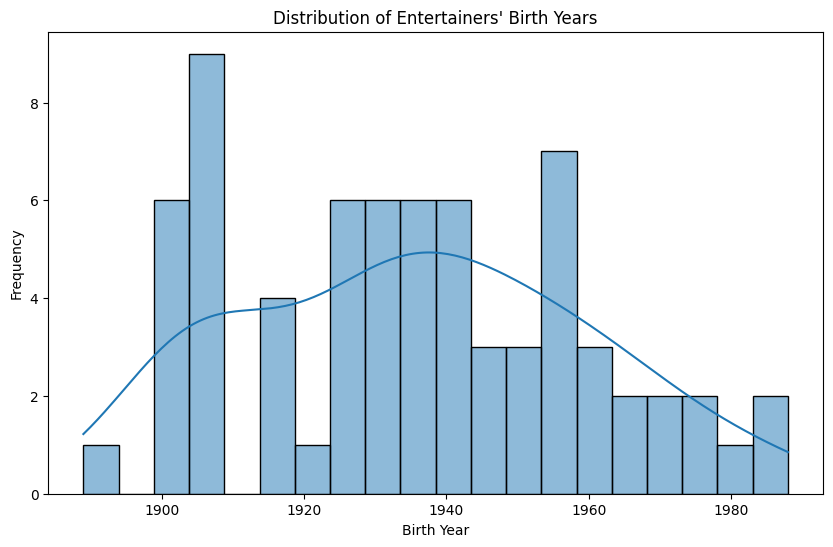

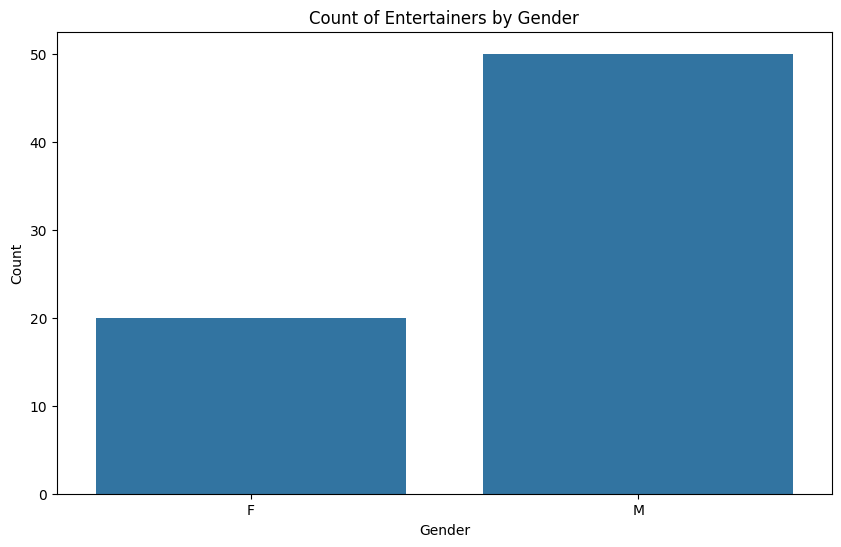

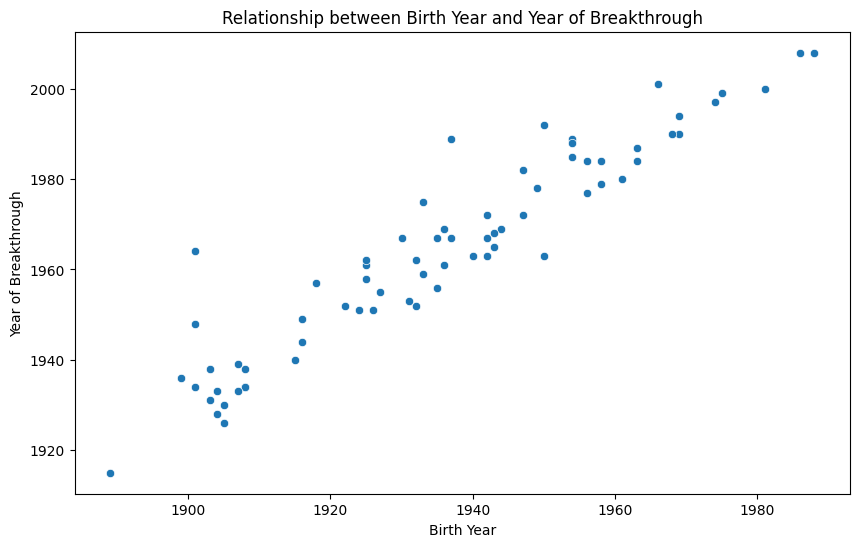

In [16]:

print("\nSummary Statistics:")
print(df.describe())

# Distribution of Entertainers' Birth Years
plt.figure(figsize=(10, 6))
sns.histplot(df['Birth Year'], bins=20, kde=True)
plt.title('Distribution of Entertainers\' Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

# Count of Entertainers by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender (traditional)')
plt.title('Count of Entertainers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Relationship between Birth Year and Year of Breakthrough
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Birth Year', y='Year of Breakthrough/#1 Hit/Award Nomination')
plt.title('Relationship between Birth Year and Year of Breakthrough')
plt.xlabel('Birth Year')
plt.ylabel('Year of Breakthrough')
plt.show()




In [ ]:
df.columns

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death'],
      dtype='object')

In [17]:

print(df.describe())

# Gender distribution
gender_distribution = df['Gender (traditional)'].value_counts()
print(gender_distribution)

# Age at breakthrough
df['Age at Breakthrough'] = df['Year of Breakthrough/#1 Hit/Award Nomination'] - df['Birth Year']
print(df['Age at Breakthrough'].describe())

# Career duration
df['Career Duration'] = df['Year of Last Major Work (arguable)'] -df['Year of Breakthrough/#1 Hit/Award Nomination']
print(df['Career Duration'].describe())

# Active years before death
df['Active Years Before Death'] = df['Year of Death'] - df['Year of Breakthrough/#1 Hit/Award Nomination']
print(df['Active Years Before Death'].describe())




        Birth Year  Year of Breakthrough/#1 Hit/Award Nomination  \
count    70.000000                                     70.000000   
mean   1935.585714                                   1964.228571   
std      24.135783                                     22.411935   
min    1889.000000                                   1915.000000   
25%    1916.000000                                   1949.500000   
50%    1935.500000                                   1963.500000   
75%    1954.000000                                   1983.500000   
max    1988.000000                                   2008.000000   

       Year of First Oscar/Grammy/Emmy  Year of Last Major Work (arguable)  
count                             70.0                           70.000000  
mean                       1976.214286                         1998.971429  
std                          21.184417                           22.874561  
min                             1929.0                         1933.000000  
25

In [30]:
custom_palette = sns.color_palette("Set2")
viridis_palette = sns.color_palette("viridis")
hist_color = 'orange'
kde_color = 'navy'

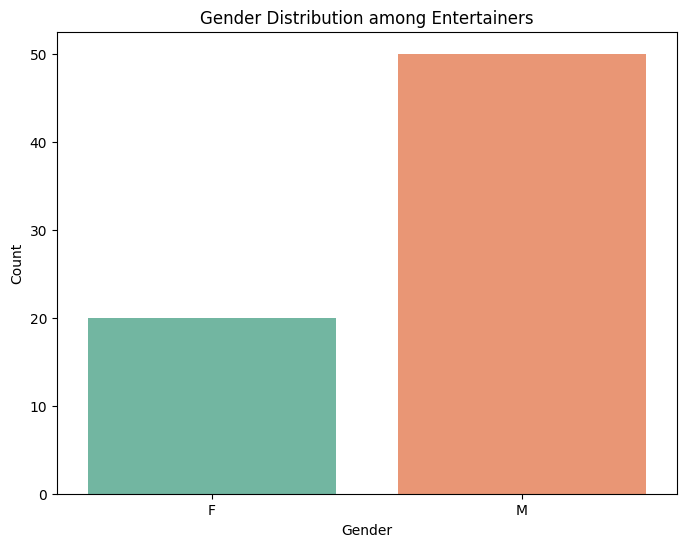

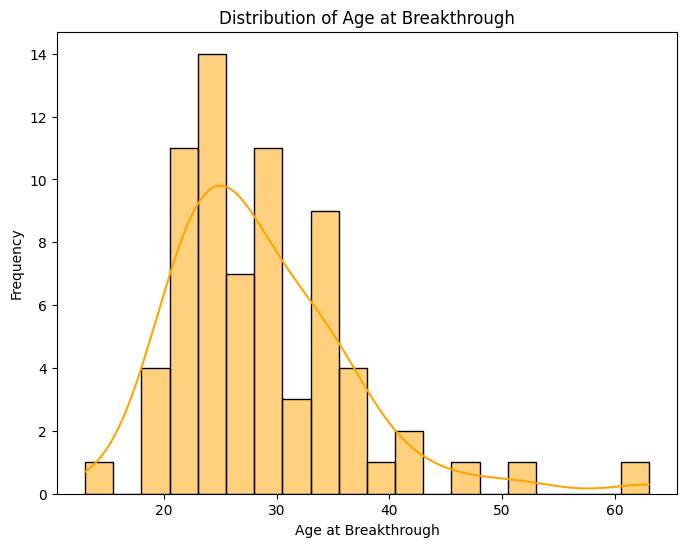

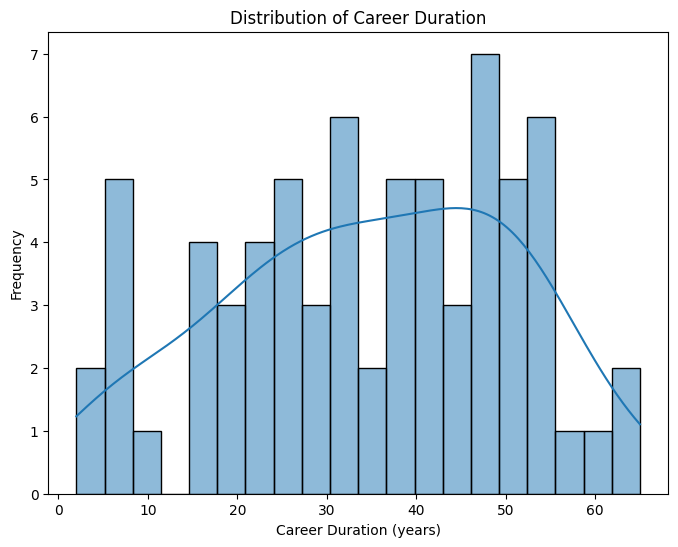

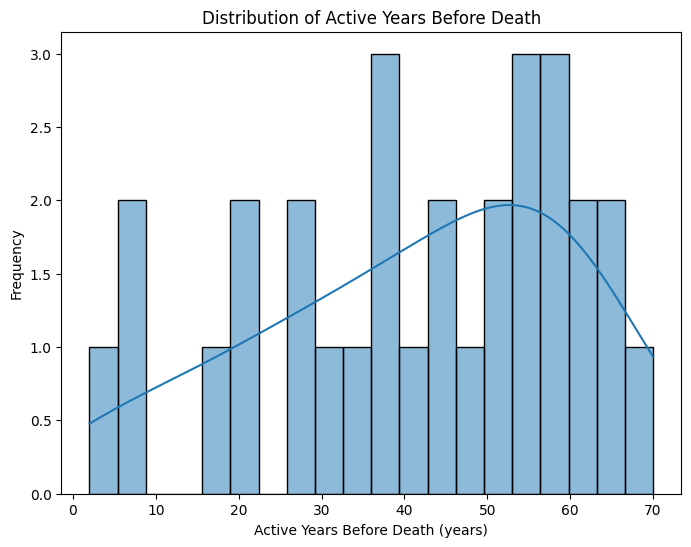

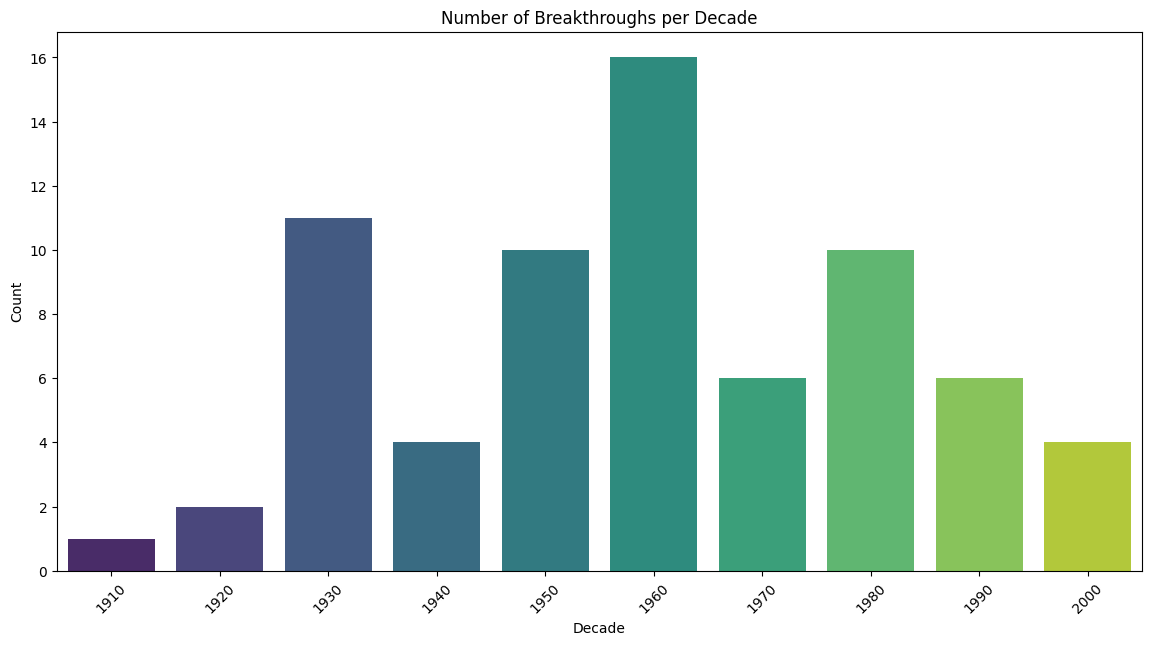

In [31]:
# Gender distribution plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender (traditional)',palette=custom_palette)
plt.title('Gender Distribution among Entertainers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age at breakthrough distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age at Breakthrough'], bins=20, kde=True, color='orange')
plt.title('Distribution of Age at Breakthrough')
plt.xlabel('Age at Breakthrough')
plt.ylabel('Frequency')
plt.show()

# Career duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Career Duration'], bins=20, kde=True)
plt.title('Distribution of Career Duration')
plt.xlabel('Career Duration (years)')
plt.ylabel('Frequency')
plt.show()

# Active years before death distribution
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Year of Death'] != -1]['Active Years Before Death'], bins=20, kde=True)
plt.title('Distribution of Active Years Before Death')
plt.xlabel('Active Years Before Death (years)')
plt.ylabel('Frequency')
plt.show()

# Number of Breakthroughs per Decade
df['Decade of Breakthrough'] = (df['Year of Breakthrough/#1 Hit/Award Nomination'] // 10) * 10
plt.figure(figsize=(14, 7))
sns.countplot(x='Decade of Breakthrough', data=df, palette='viridis')
plt.title('Number of Breakthroughs per Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
report = {
    "Gender Distribution": gender_distribution,
    "Age at Breakthrough": df['Age at Breakthrough'].describe(),
    "Career Duration": df['Career Duration'].describe(),
    "Active Years Before Death": df[df['Year of Death'] != -1]['Active Years Before Death'].describe()
}

for key, value in report.items():
    print(f"{key}:\n{value}\n")

Gender Distribution:
Gender (traditional)
M    50
F    20
Name: count, dtype: int64

Age at Breakthrough:
count    70.000000
mean     28.642857
std       8.124102
min      13.000000
25%      23.250000
50%      26.000000
75%      33.000000
max      63.000000
Name: Age at Breakthrough, dtype: float64

Career Duration:
count    70.000000
mean     34.742857
std      16.059388
min       2.000000
25%      22.500000
50%      36.500000
75%      47.000000
max      65.000000
Name: Career Duration, dtype: float64

Active Years Before Death:
count     30
unique    25
top       59
freq       2
Name: Active Years Before Death, dtype: int64



In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to pdf /content/Heart_disease_code.ipynb